In [11]:
import sys
import subprocess

packages = ['numpy', 'pandas', 'matplotlib', 'seaborn', 'scikit-learn']
print("Installing required packages...")
for package in packages:
    subprocess.check_call([sys.executable, "-m", "pip", "install", package, "-q"], 
                         stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
print("All packages installed successfully!")


Installing required packages...
All packages installed successfully!


In [12]:
import numpy as np
import pandas as pd
import os

data_file = 'Default_Fin.csv'

if os.path.exists(data_file):
    print(f"Data file found: {data_file}")
else:
    print(f"Error: {data_file} not found in current directory.")
    print(f"Current directory: {os.getcwd()}")
    raise FileNotFoundError(f"Please ensure {data_file} is in the current directory")


Data file found: Default_Fin.csv


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('Default_Fin.csv')
print(df.shape)
print(df.head())

(10000, 5)
   Index  Employed  Bank Balance  Annual Salary  Defaulted?
0      1         1       8754.36      532339.56           0
1      2         0       9806.16      145273.56           0
2      3         1      12882.60      381205.68           0
3      4         1       6351.00      428453.88           0
4      5         1       9427.92      461562.00           0


In [15]:
for col in ['Employed', 'Defaulted?']:
 
    print(df[col].value_counts())

Employed
1    7056
0    2944
Name: count, dtype: int64
Defaulted?
0    9667
1     333
Name: count, dtype: int64


In [16]:
df['Annual Salary'].describe()

count     10000.000000
mean     402203.782224
std      160039.674988
min        9263.640000
25%      256085.520000
50%      414631.740000
75%      525692.760000
max      882650.760000
Name: Annual Salary, dtype: float64

In [17]:
df['Bank Balance'].describe()

count    10000.000000
mean     10024.498524
std       5804.579486
min          0.000000
25%       5780.790000
50%       9883.620000
75%      13995.660000
max      31851.840000
Name: Bank Balance, dtype: float64

<Figure size 800x400 with 0 Axes>

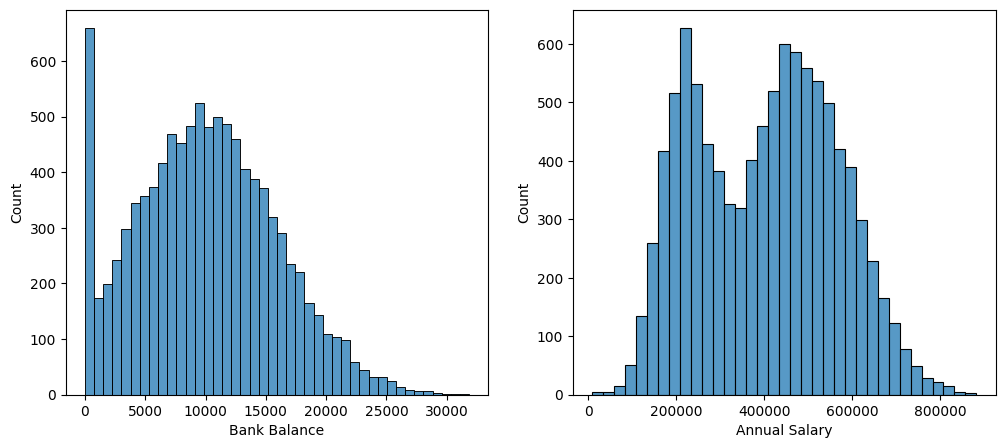

In [18]:
plt.figure(figsize=(8,4))
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(df['Bank Balance'], ax=axes[0])
sns.histplot(df['Annual Salary'], ax=axes[1])
plt.show()

<Axes: >

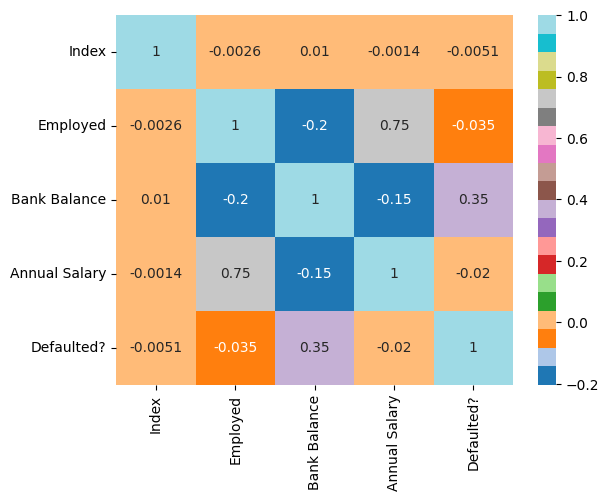

In [19]:
sns.heatmap(df.corr(), annot = True, cmap = "tab20")

<Axes: xlabel='Defaulted?', ylabel='count'>

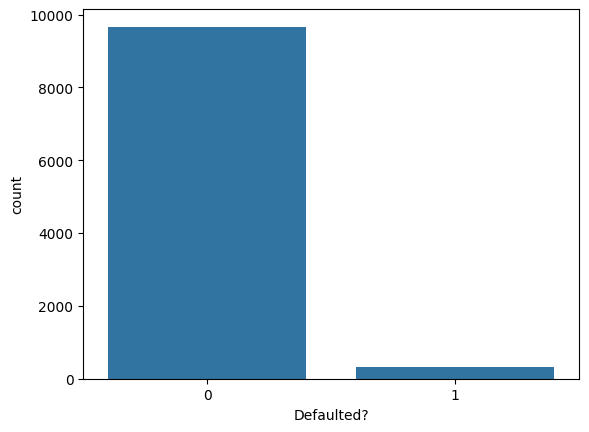

In [20]:
sns.countplot(df, x = 'Defaulted?')

In [21]:
df_main = df.drop('Index', axis = 1)
df_main.head()

,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0


In [22]:
x = df_main.drop('Defaulted?', axis = 1)
y = df_main['Defaulted?']

print(x.head())
print(y.head())


   Employed  Bank Balance  Annual Salary
0         1       8754.36      532339.56
1         0       9806.16      145273.56
2         1      12882.60      381205.68
3         1       6351.00      428453.88
4         1       9427.92      461562.00
0    0
1    0
2    0
3    0
4    0
Name: Defaulted?, dtype: int64


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.33, random_state= 42)

print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

x_train: (6700, 3)
y_train: (6700,)
x_test: (3300, 3)
y_test: (3300,)


In [25]:
x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [26]:
from sklearn.linear_model import LogisticRegressionCV

In [27]:
model = LogisticRegressionCV()

In [28]:
model.fit(x_train, y_train)

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1780: FutureWarning: The default value for l1_ratios will change from None to (0.0,) in version 1.10. From version 1.10 onwards, only array-like with values in [0, 1] will be allowed, None will be forbidden. To avoid this warning, explicitly set a value, e.g. l1_ratios=(0,).
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1823: FutureWarning: The fitted attributes of LogisticRegressionCV will be simplified in scikit-learn 1.10 to remove redundancy. Set`use_legacy_attributes=False` to enable the new behavior now, or set it to `True` to silence this warning during the transition period while keeping the deprecated behavior for the time being. The default value of use_legacy_attributes will change from True to False in scikit-learn 1.10. See the docstring of LogisticRegressionCV for more details.
  warnings.warn(


,"Cs Cs: int or list of floats, default=10Each of the values in Cs describes the inverse of regularizationstrength. If Cs is as an int, then a grid of Cs values are chosenin a logarithmic scale between 1e-4 and 1e4.Like in support vector machines, smaller values specify strongerregularization.",10
,"l1_ratios l1_ratios: array-like of shape (n_l1_ratios), default=NoneFloats between 0 and 1 passed as Elastic-Net mixing parameter (scaling betweenL1 and L2 penalties). For `l1_ratio = 0` the penalty is an L2 penalty. For`l1_ratio = 1` it is an L1 penalty. For `0 < l1_ratio < 1`, the penalty is acombination of L1 and L2.All the values of the given array-like are tested by cross-validation and theone giving the best prediction score is used... warning:: Certain values of `l1_ratios`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... deprecated:: 1.8 `l1_ratios=None` is deprecated in 1.8 and will raise an error in version 1.10. Default value will change from `None` to `(0.0,)` in version 1.10.",'warn'
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"cv cv: int or cross-validation generator, default=NoneThe default cross-validation generator used is Stratified K-Folds.If an integer is provided, it specifies the number of folds, `n_folds`, used.See the module :mod:`sklearn.model_selection` module for thelist of possible cross-validation objects... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",None
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer dual=False whenn_samples > n_features.",False
,"penalty penalty: {'l1', 'l2', 'elasticnet'}, default='l2'Specify the norm of the penalty:- `'l2'`: add a L2 penalty term (used by default);- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"scoring scoring: str or callable, default=NoneThe scoring method to use for cross-validation. Options:- str: see :ref:`scoring_string_names` for options.- callable: a scorer callable object (e.g., function) with signature ``scorer(estimator, X, y)``. See :ref:`scoring_callable` for details.- `None`: :ref:`accuracy ` is used.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multiclass` problems (`n_classes >= 3`), all solvers except 'liblinear' minimize the full multinomial loss, 'liblinear' will raise an error.- 'newton-cholesky' is a good choice for `n_samples` >> `n_features * n_classes`, especially with one-hot encoded categorical features with rare categories. Be aware that the memory usage of this solver has a quadratic dependency on `n_features * n_classes` because it explicitly computes the full Hessian matrix.- For small datasets, 'liblinear' is a good choice, whereas 'sag' and 'saga' are faster for large ones;- 'liblinear' might be slower in :class:`LogisticRegressionCV` because it does not handle warm-starting.- 'liblinear' can only handle binary classification by default. To apply a one-versus-rest scheme for the multiclass 

In [29]:
print(model.coef_[0])
print(model.get_params())

[0.28786914 2.86748851 0.00513045]
{'Cs': 10, 'class_weight': None, 'cv': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1.0, 'l1_ratios': 'warn', 'max_iter': 100, 'n_jobs': None, 'penalty': 'deprecated', 'random_state': None, 'refit': True, 'scoring': None, 'solver': 'lbfgs', 'tol': 0.0001, 'use_legacy_attributes': 'warn', 'verbose': 0}


In [30]:
prediction = model.predict(x_test)

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
confusion_matrix(y_test, prediction)

array([[3177,   13],
       [  77,   33]], dtype=int64)

In [33]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3190
           1       0.72      0.30      0.42       110

    accuracy                           0.97      3300
   macro avg       0.85      0.65      0.70      3300
weighted avg       0.97      0.97      0.97      3300

